##데이터 불러오기

In [522]:
import pandas as pd
import numpy as np
import seaborn as sns

df_origin = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv")
df = df_origin
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [523]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import matplotlib as mpl

# 폰트 변환
# Windows
# mpl.rc("font", family='Malgun Gothic')

# MacOS
mpl.rc("font", family='AppleGothic')

# 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

warnings.filterwarnings("ignore")
%matplotlib inline

# 첫번째 방법
%config InlineBackend.figure_format='retina'

# 두번째 방법
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

# 둘 중 편한걸로 사용

## EDA

#### 데이터 타입 확인 및 변경

In [524]:
#데이터 확인
df.info()

#sales 값 object에서 float으로 타입 변경
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'],errors = 'coerce') #coerce = 오류값 nan값으로 대체
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'],errors = 'coerce')
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'],errors = 'coerce')
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'],errors = 'coerce')

#Total_sales 칼럼을 새로 만든다.
df['Total_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [525]:
#Total_sales가 0인 행 확인
condition = df["Total_sales"]<=0
# print("Total_sales가 0인 행\n",df[condition].count(),"\n")
print("Sales 0값 제거 전 데이터:", df.shape)

#Total Sales가 0인 데이터도 삭제
df.drop(df.loc[df["Total_sales"] == 0].index, inplace = True) 
print("Sales 0값 제거 후 데이터:",df.shape,"\n")

#Year가 1900년도 이전의 값들 모두 제거
print("Year 오류값 제거 전 데이터:",df.shape)
# df.drop(df.loc[df["Total_sales"] == 0].index, inplace = True) 
df.drop(df[df["Year"] < 1900].index, inplace=True)
print("Year 오류값 제거 후 데이터:",df.shape)

Sales 0값 제거 전 데이터: (16598, 11)
Sales 0값 제거 후 데이터: (16597, 11) 

Year 오류값 제거 전 데이터: (16597, 11)
Year 오류값 제거 후 데이터: (16497, 11)


#### 결측치 확인 및 제거

In [526]:
#결측치 확인
print("결측치:\n",df.isnull().sum(),"\n") 

print("결측치 제거 전 데이터:",df.shape)

df = df.drop(df.columns[[0]], axis=1) #첫번째 열 제거
df = df.dropna(axis = 0) #결측치가 포함된 모든 행 제거
df = df.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='') #인덱스 reset

print("결측치 제거 후 데이터:",df.shape)

결측치:
 Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales       197
EU_Sales       198
JP_Sales       198
Other_Sales    200
Total_sales    779
dtype: int64 

결측치 제거 전 데이터: (16497, 11)
결측치 제거 후 데이터: (15381, 10)


#### 중복 데이터 값 확인 및 제거

In [527]:
#duplicated 게임이름 검색하여 확인
df.duplicated().sum()

#모든 값이 동일한 데이터가 없기 때문에 제거 대상 없음

0

##지역에 따라서 선호하는 게임 장르

NA_Sales: 11204
EU_Sales: 10083
JP_Sales: 5725
Other_Sales: 9424 

NA_Sales       4055.22
EU_Sales       2251.70
JP_Sales       1192.14
Other_Sales     743.86
dtype: float64


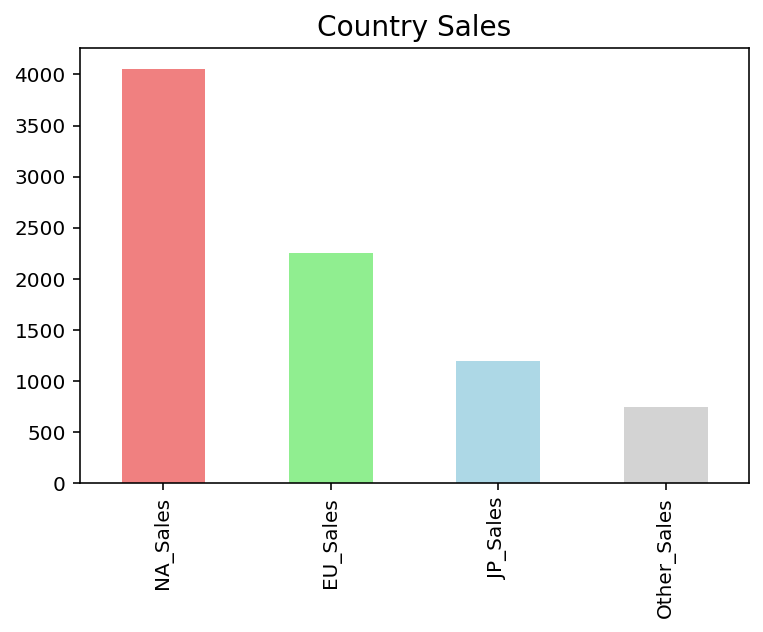

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,801.89,486.60,149.85,176.14
Sports,633.87,349.85,126.65,126.13
Shooter,544.63,293.38,36.53,96.68
Role-Playing,283.86,160.10,314.15,50.86
Platform,410.96,184.11,121.88,47.88
Misc,380.36,200.14,99.47,69.97
Racing,334.14,222.66,50.60,73.48
Fighting,210.51,94.18,82.58,34.33
Simulation,173.64,106.97,61.51,29.49


In [528]:
#지역별 sales값 확인
print("NA_Sales:",df[df["NA_Sales"] > 0].value_counts().sum())
print("EU_Sales:",df[df["EU_Sales"] > 0].value_counts().sum())
print("JP_Sales:",df[df["JP_Sales"] > 0].value_counts().sum())
print("Other_Sales:",df[df["Other_Sales"] > 0].value_counts().sum(),"\n")

df_hist_area = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
print(df_hist_area)

df_hist_area.plot.bar(color=["lightcoral","lightgreen","lightblue","lightgray"])
plt.title('Country Sales',fontsize=14) ## 타이틀 출력
plt.show()


#지역별 국가가 선호하는 장르 순위(출고량 합산 값)
df.groupby(["Genre"],axis=0, sort = True).sum().sort_values(by = ["Total_sales"],ascending = False)[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].head(10)

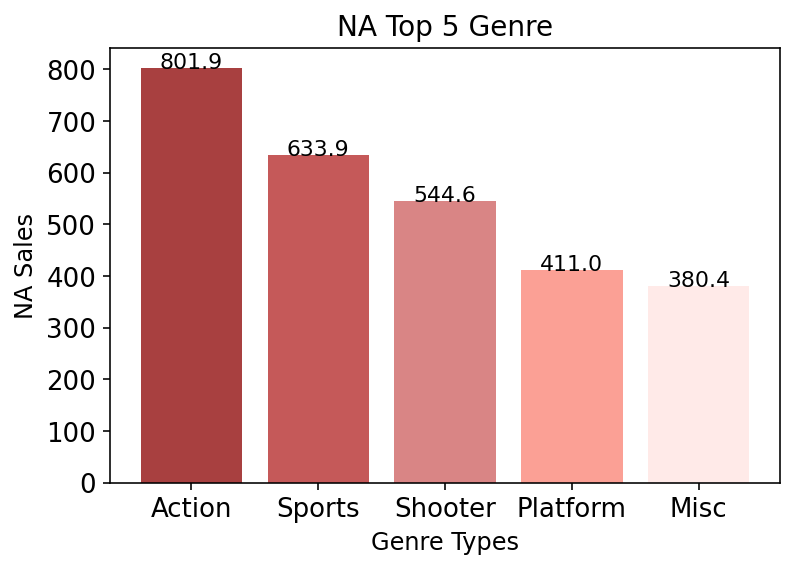

In [529]:
#미국이 선호하는 장르 순위(출고량 합산 값)
df_NA = df.groupby(["Genre"],axis=0, sort = True).sum()["NA_Sales"].sort_values(ascending = False).head(5)

## 시각화
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 12 ## x축, y축 폰트 사이즈
 
fig = plt.figure(figsize=(6,4)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
# colors = sns.color_palette('hls',len(df_US)) ## 색상 지정
 
xtick_label_position = list(range(len(df_NA))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, df_NA.index, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, df_NA, color=["darkred","firebrick","indianred","salmon","mistyrose"], alpha=0.75, linewidth=3) ## 바차트 출력
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            round(df_NA[i],1),ha='center',fontsize=11)
    
plt.title('NA Top 5 Genre',fontsize=14) ## 타이틀 출력
plt.xlabel('Genre Types',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylabel('NA Sales',fontsize=axis_label_size) ## y축 라벨 출력
plt.show()

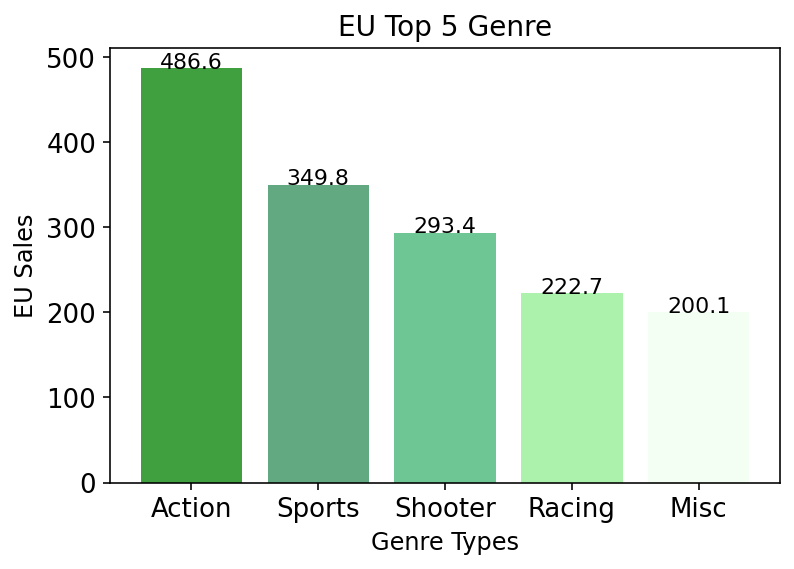

In [530]:
#유럽연합이 선호하는 장르 순위
df_EU = df.groupby(["Genre"],axis=0, sort = True).sum()["EU_Sales"].sort_values(ascending = False).head(5)

## 시각화
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 12 ## x축, y축 폰트 사이즈
 
fig = plt.figure(figsize=(6,4)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
# colors = sns.color_palette('hls',len(df_EU)) ## 색상 지정
 
xtick_label_position = list(range(len(df_EU))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, df_EU.index, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, df_EU, color=["green","seagreen","mediumseagreen","lightgreen","honeydew"], alpha=0.75, linewidth=3) ## 바차트 출력
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            round(df_EU[i],1),ha='center',fontsize=11)
    
plt.title('EU Top 5 Genre',fontsize=14) ## 타이틀 출력
plt.xlabel('Genre Types',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylabel('EU Sales',fontsize=axis_label_size) ## y축 라벨 출력
plt.show()

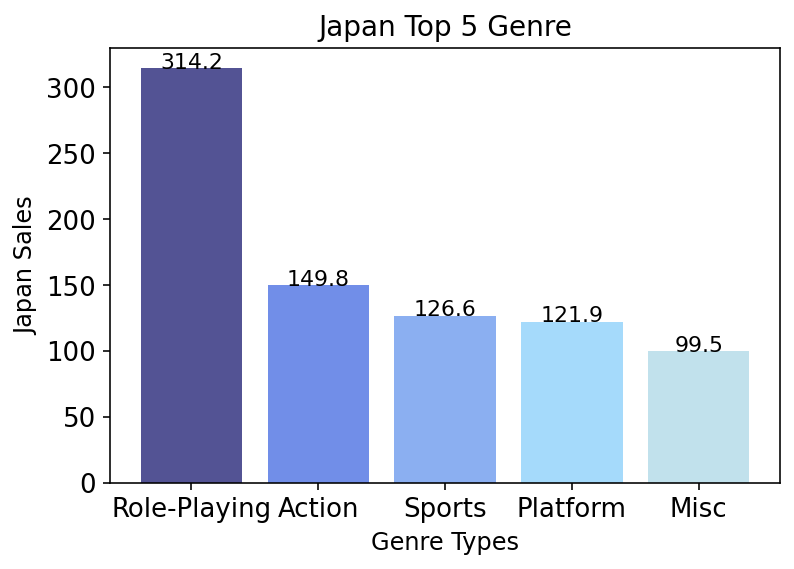

In [531]:
#일본이 선호하는 장르 순위
df_JP = df.groupby(["Genre"],axis=0, sort = True).sum()["JP_Sales"].sort_values(ascending = False).head(5)

## 시각화
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 12 ## x축, y축 폰트 사이즈
 
fig = plt.figure(figsize=(6,4)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
# colors = sns.color_palette('hls',len(df_EU)) ## 색상 지정
 
xtick_label_position = list(range(len(df_JP))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, df_JP.index, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, df_JP, color=["midnightblue","royalblue","cornflowerblue","lightskyblue","lightblue"], alpha=0.75, linewidth=3) ## 바차트 출력
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            round(df_JP[i],1),ha='center',fontsize=11)
    
plt.title('Japan Top 5 Genre',fontsize=14) ## 타이틀 출력
plt.xlabel('Genre Types',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylabel('Japan Sales',fontsize=axis_label_size) ## y축 라벨 출력
plt.show()

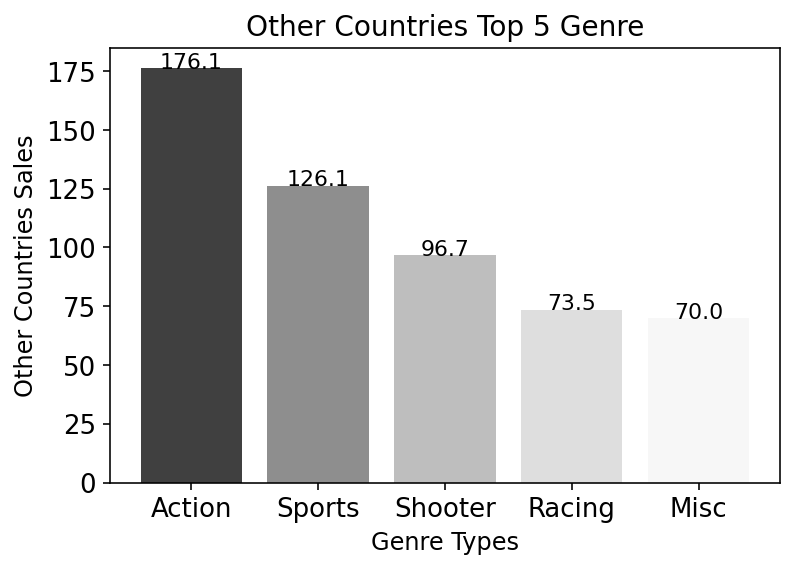

In [532]:
#유럽연합이 선호하는 장르 순위

df_Others = df.groupby(["Genre"],axis=0, sort = True).sum()["Other_Sales"].sort_values(ascending = False).head(5)

## 시각화
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 12 ## x축, y축 폰트 사이즈
 
fig = plt.figure(figsize=(6,4)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
# colors = sns.color_palette('hls',len(df_EU)) ## 색상 지정
 
xtick_label_position = list(range(len(df_Others))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, df_Others.index, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, df_Others, color=["black","dimgray","darkgray","lightgray","whitesmoke"], alpha=0.75, linewidth=3) ## 바차트 출력
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            round(df_Others[i],1),ha='center',fontsize=11)
    
plt.title('Other Countries Top 5 Genre',fontsize=14) ## 타이틀 출력
plt.xlabel('Genre Types',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylabel('Other Countries Sales',fontsize=axis_label_size) ## y축 라벨 출력
plt.show()

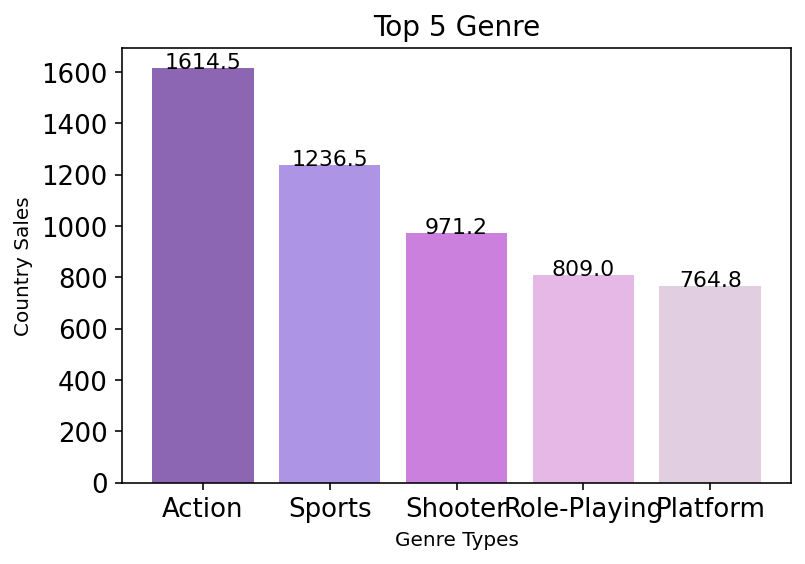

In [533]:
#유럽연합이 선호하는 장르 순위

df_Total = df.groupby(["Genre"],axis=0, sort = True).sum()["Total_sales"].sort_values(ascending = False).head(5)

## 시각화
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 10 ## x축, y축 폰트 사이즈
 
fig = plt.figure(figsize=(6,4)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
# colors = sns.color_palette('hls',len(df_EU)) ## 색상 지정
 
xtick_label_position = list(range(len(df_Total))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, df_Total.index, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, df_Total, color=["rebeccapurple","mediumpurple","mediumorchid","plum","thistle"], alpha=0.75, linewidth=3) ## 바차트 출력
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            round(df_Total[i],1),ha='center',fontsize=11)
    
plt.title('Top 5 Genre',fontsize=14) ## 타이틀 출력
plt.xlabel('Genre Types',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylabel('Country Sales',fontsize=axis_label_size) ## y축 라벨 출력
plt.show()

##연도별 게임의 트렌드

In [560]:
#Year 'int' 타입으로 변환
df['Year'].astype('int64')

#년도 별 출고량이 가장 높은 장르
df_Year = pd.DataFrame(df.groupby(['Year','Genre'])["Total_sales"].sum()).reset_index().sort_values(by=["Year","Total_sales"],ascending=[True,False])
df_Year.head(10)

,Year,Genre,Total_sales
3,1980.0,Shooter,7.07
2,1980.0,Misc,2.47
1,1980.0,Fighting,0.77
0,1980.0,Action,0.34
4,1981.0,Action,12.82
8,1981.0,Shooter,10.02
5,1981.0,Platform,6.92
6,1981.0,Puzzle,2.25
10,1981.0,Sports,0.78
7,1981.0,Racing,0.48


In [565]:
# pd.DataFrame(df_Year.groupby(["Year"]))


df_Year.groupby(["Year"])["Total_sales"].nlargest(2).reset_index()
# df_Year.drop(df_Year.loc[df_Year["Total_sales"] != ].index, inplace = True) 



,Year,level_1,Total_sales
0,1980.0,3,7.07
1,1980.0,2,2.47
2,1981.0,4,12.82
3,1981.0,8,10.02
4,1982.0,14,10.04
...,...,...,...
71,2015.0,369,65.78
72,2016.0,373,19.62
73,2016.0,380,13.68
74,2017.0,385,0.04


##출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [536]:
#플렛폼별 게임 갯수 top10
print("플렛폼별 게임 카운트 top10")
print(df['Platform'].value_counts().head(10),"\n")

#플렛폼 별 토탈 게임 출고량 순 top10
print("플렛폼 별 토탈 게임 출고량 순 top10")
print(df.groupby(['Platform']).sum()["Total_sales"].sort_values(ascending = False).head(10))

플렛폼별 게임 카운트 top10
DS      2020
PS2     2012
PS3     1227
Wii     1217
X360    1171
PSP     1130
PS      1114
PC       884
XB       758
GBA      743
Name: Platform, dtype: int64 

플렛폼 별 토탈 게임 출고량 순 top10
Platform
PS2     1162.28
PS3      900.50
X360     884.52
Wii      867.33
DS       770.53
PS       679.50
PSP      279.25
GBA      279.08
PS4      250.54
PC       242.35
Name: Total_sales, dtype: float64


In [537]:
df.info

<bound method DataFrame.info of                                                  Name Platform    Year  \
0                        Candace Kane's Candy Factory       DS  2008.0   
1                                      The Munchables      Wii  2009.0   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
3                    Deal or No Deal: Special Edition       DS  2010.0   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
15376                         Ice Age 2: The Meltdown       GC  2006.0   
15377                     Rainbow Islands: Revolution      PSP  2005.0   
15378                                        NBA 2K16      PS3  2015.0   
15379                     Toukiden: The Age of Demons      PSV  2013.0   
15380                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
